In [187]:
# Import modules

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymatgen.analysis.phase_diagram import PDPlotter, PhaseDiagram, PDEntry, Composition, Element
sys.path.append("/Users/lucy/PycharmProjects/ThermoPot") # ThermoPot install path as not on PYPI yet
from thermopot import materials, calculations, reactions, potentials

data_path = "/Users/lucy/PycharmProjects/ThermoPot/BaZrS3/"  # Path to Ba-Zr-S data
%matplotlib inline

In [348]:
# Use Thermopot to calculate Gibbs free energies at finite temperature

BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/hse06/aims.out")
Ba2Zr1S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba2ZrS4_I4_mmm/hse06/aims.out")
Ba3Zr2S7_calc= calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba3Zr2S7_I4_mmm/hse06/aims.out")
Ba4Zr3S10_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba4Zr3S10_I4_mmm/hse06/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/hse06/aims.out")
Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/hse06/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/hse06/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/hse06/aims.out")
BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/hse06/aims.out")
BaS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P-421m/hse06/aims.out")
BaS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS2_C2_c/hse06/aims.out")
Ba2S3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Ba2S3_I4_1md/hse06/aims.out")
Zr3S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Zr3S4_Fd-3m/hse06/aims.out")
ZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS3_P2_1m/hse06/aims.out")
ZrS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_Fm-3m/hse06/aims.out")


Ba_material = materials.Solid("Ba",{"Ba":1},data_path+"phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr_material = materials.Solid("Zr",{"Zr":1},data_path+"phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S_material = materials.Solid("S",{"S":1},data_path+"phonopy_output/S_P2_c.dat",calculation=S_calc)
BaZrS3_material = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},data_path+"phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)
Ba2Zr1S4_material = materials.Solid("Ba2Zr1S4",{"Ba": 2,"Zr": 1,"S":4},data_path+"phonopy_output/Ba2ZrS4_I4_mmm.dat", calculation=Ba2Zr1S4_calc)
Ba3Zr2S7_material = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},data_path+"phonopy_output/Ba3Zr2S7_I4_mmm.dat",calculation=Ba3Zr2S7_calc)
Ba4Zr3S10_material = materials.Solid("Ba4Zr3S10",{"Ba": 4,"Zr": 3,"S":10},data_path+"phonopy_output/Ba4Zr3S10_I4_mmm.dat", calculation=Ba4Zr3S10_calc)
ZrS2_material = materials.Solid("ZrS2",{"Zr": 1,"S": 2},data_path+"/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
BaS_material = materials.Solid("BaS",{"Ba": 1,"S": 1},data_path+"/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS3_material = materials.Solid("BaS3",{"Ba": 1,"S": 3},data_path+"/phonopy_output/BaS3_P-421m.dat",calculation=BaS3_calc)
BaS2_material = materials.Solid("BaS2",{"Ba": 1,"S": 2},data_path+"/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
Ba2S3_material = materials.Solid("Ba2S3",{"Ba": 2,"S": 3},data_path+"/phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)
Zr3S4_material = materials.Solid("Zr3S4",{"Zr": 3,"S": 4},data_path+"/phonopy_output/Zr3S4_Fd-3m.dat",calculation=Zr3S4_calc)
ZrS3_material = materials.Solid("ZrS3",{"Zr": 1,"S": 3},data_path+"/phonopy_output/ZrS3_P2_1m.dat",calculation=ZrS3_calc)
ZrS_material = materials.Solid("ZrS",{"Zr": 1,"S": 1},data_path+"/phonopy_output/ZrS_Fm-3m.dat",calculation=ZrS_calc)



# High temperature phase diagram

<module 'matplotlib.pyplot' from '/Users/lucy/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

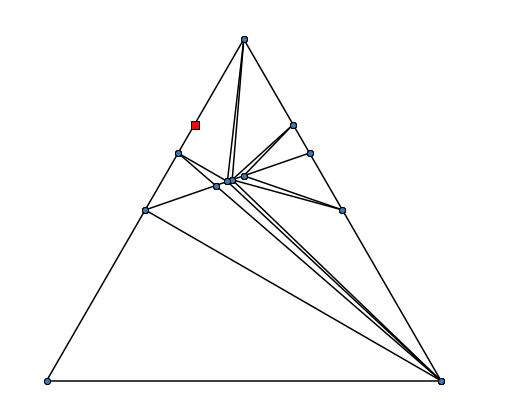

In [465]:
# Use Gibbs free energies and pymatgen to create phase diagram object

T = 1200
P = 1E5 # independent of this as solids are assumed incompressible

BaZrS3 = PDEntry(Composition("BaZrS3"),BaZrS3_material.mu(T,P,xc="hse06"))
Ba = PDEntry(Composition("Ba"),Ba_material.mu(T,P,xc="hse06"))
Zr = PDEntry(Composition("Zr"),Zr_material.mu(T,P,xc="hse06"))
S = PDEntry(Composition("S"),S_material.mu(T,P,xc="hse06"))
Ba4Zr3S10 = PDEntry(Composition("Ba4Zr3S10"),Ba4Zr3S10_material.mu(T,P,xc="hse06") )
ZrS2 = PDEntry(Composition("ZrS2"),ZrS2_material.mu(T,P,xc="hse06") )
Ba3Zr2S7 = PDEntry(Composition("Ba3Zr2S7"),Ba3Zr2S7_material.mu(T,P,xc="hse06") )
Ba2Zr1S4 = PDEntry(Composition("Ba2Zr1S4"),Ba2Zr1S4_material.mu(T,P,xc="hse06") )
BaS = PDEntry(Composition("BaS"),BaS_material.mu(T,P,xc="hse06"))
BaS3 = PDEntry(Composition("BaS3"),BaS3_material.mu(T,P,xc="hse06"))
BaS2 = PDEntry(Composition("BaS2"),BaS2_material.mu(T,P,xc="hse06"))
#Ba2S3 = PDEntry(Composition("Ba2S3"),Ba2S3_material.mu(T,P,xc="hse06"))
Zr3S4 = PDEntry(Composition("Zr3S4"),Zr3S4_material.mu(T,P,xc="hse06"))
ZrS3 = PDEntry(Composition("ZrS3"),ZrS3_material.mu(T,P,xc="hse06"))
ZrS = PDEntry(Composition("ZrS"),ZrS_material.mu(T,P,xc="hse06"))

pd = PhaseDiagram([BaZrS3,Ba,Zr,S,Ba4Zr3S10,ZrS2,Ba2Zr1S4,Ba3Zr2S7,BaS,BaS3,BaS2,Zr3S4,ZrS3,ZrS])
plotter = PDPlotter(pd, show_unstable=0.2, backend="matplotlib",markerfacecolor=(0.2157, 0.4941, 0.7216))
plotter.get_plot(label_stable=False,label_unstable=False)

<module 'matplotlib.pyplot' from '/Users/lucy/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

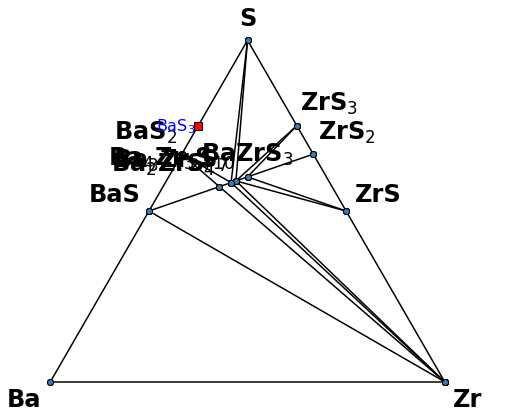

In [454]:
# the labels are messy so we removes some compounds from our analysis so as to 
# read labels where obscured (not shown here).
plotter.get_plot()

In [490]:
pd.get_decomposition(Composition("Ba0.2225Zr0.185S0.5925"))

{PDEntry : Ba1 Zr1 S3 with energy = -356587.0921: 0.36250000000000426,
 PDEntry : Ba4 Zr3 S10 with energy = -1305797.9898: 0.6374999999999957}

In [498]:
pd.get_decomposition(Composition("Ba0.226Zr0.225S0.548"))

{PDEntry : Ba3 Zr2 S7 with energy = -949210.8304: 0.40840840840841963,
 PDEntry : Ba4 Zr3 S10 with energy = -1305797.9898: 0.5275275275275177,
 PDEntry : Zr1 with energy = -98784.1273: 0.06406406406406406}

In [501]:
pd.get_decomposition(Composition("Ba0.211Zr0.19S0.598"))

{PDEntry : Ba1 Zr1 S3 with energy = -356587.0921: 0.4954954954954971,
 PDEntry : Zr1 S3 with energy = -131430.9977: 0.028028028028026508,
 PDEntry : Ba4 Zr3 S10 with energy = -1305797.9898: 0.4764764764764765}

In [519]:
#### Zr_0 after treatment
pd.get_decomposition(Composition("Ba0.2127Zr0.1923S0.595"))

{PDEntry : Ba1 Zr1 S3 with energy = -356587.0921: 0.609499999999997,
 PDEntry : Zr1 S1 with energy = -109667.3752: 0.004599999999999493,
 PDEntry : Ba4 Zr3 S10 with energy = -1305797.9898: 0.38589999999999947}

In [529]:
#### Zr_5 after treatment
pd.get_decomposition(Composition("Ba0.19Zr0.226S0.584"))

{PDEntry : Ba1 Zr1 S3 with energy = -356587.0921: 0.509999999999998,
 PDEntry : Zr1 S1 with energy = -109667.3752: 0.1160000000000001,
 PDEntry : Ba4 Zr3 S10 with energy = -1305797.9898: 0.37400000000000233}

In [531]:
24.7-5.4

19.299999999999997

In [495]:
pd.get_decomposition(Composition("Ba0.247Zr0.222S0.532"))

{PDEntry : Ba3 Zr2 S7 with energy = -949210.8304: 0.45554445554445877,
 PDEntry : Ba2 Zr1 S4 with energy = -592623.6108: 0.46503496503495967,
 PDEntry : Zr1 with energy = -98784.1273: 0.07942057942057934}

In [496]:
pd.get_decomposition(Composition("Ba0.245Zr0.23S0.524"))

{PDEntry : Ba3 Zr2 S7 with energy = -949210.8304: 0.4084084084084161,
 PDEntry : Ba2 Zr1 S4 with energy = -592623.6108: 0.5010010010010006,
 PDEntry : Zr1 with energy = -98784.1273: 0.09059059059059055}

# Low temperature phase diagram

<module 'matplotlib.pyplot' from '/Users/lucy/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

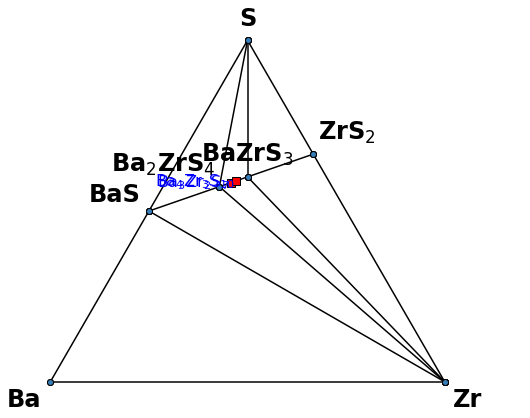

In [352]:
# Use Gibbs free energies and pymatgen to create phase diagram object

T = 0
P = 1E5

BaZrS3 = PDEntry(Composition("BaZrS3"),BaZrS3_material.mu(T,P,xc="hse06"))
Ba = PDEntry(Composition("Ba"),Ba_material.mu(T,P,xc="hse06"))
Zr = PDEntry(Composition("Zr"),Zr_material.mu(T,P,xc="hse06"))
S = PDEntry(Composition("S"),S_material.mu(T,P,xc="hse06"))
Ba4Zr3S10 = PDEntry(Composition("Ba4Zr3S10"),Ba4Zr3S10_material.mu(T,P,xc="hse06"))
ZrS2 = PDEntry(Composition("ZrS2"),ZrS2_material.mu(T,P,xc="hse06") )
Ba3Zr2S7 = PDEntry(Composition("Ba3Zr2S7"),Ba3Zr2S7_material.mu(T,P,xc="hse06"))
Ba2Zr1S4 = PDEntry(Composition("Ba2Zr1S4"),Ba2Zr1S4_material.mu(T,P,xc="hse06"))
BaS = PDEntry(Composition("BaS"),BaS_material.mu(T,P,xc="hse06"))

pd = PhaseDiagram([BaZrS3,Ba,Zr,S,Ba4Zr3S10,ZrS2,Ba2Zr1S4,Ba3Zr2S7,BaS])
plotter = PDPlotter(pd, show_unstable=0.2, backend="matplotlib",markerfacecolor=(0.2157, 0.4941, 0.7216))
plotter.get_plot()

In [353]:
pd.get_decomposition(Composition("Ba0.226Zr0.203S0.63"))


{PDEntry : Ba2 Zr1 S4 with energy = -592619.3221: 0.15864022662889532,
 PDEntry : Ba1 Zr1 S3 with energy = -356584.2168: 0.840415486307835,
 PDEntry : Zr1 with energy = -98783.5041: 0.0009442870632671574}